# 12. Which cities are the worst with regard to access to train facilities? You can do this by calculating the travel distance, travel time, … Would you recommend based on this, and the visualization in Q5, to create some new routes?

In [4]:
import src.data_processing.data as data
import matplotlib.pyplot as plt

In [5]:
facilities = data.facilities

The 10 stations with the least number of facilities

In [6]:
facilities['count'] = facilities.loc[:,['ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop']].sum(axis=1)
facilities[facilities["count"] == 0][["name" , "count"]]

,name,count
56,bambrugge,0.0
61,bastogne-nord,0.0
62,bastogne-sud,0.0
68,beignée,0.0
88,bleret,0.0
103,bracquegnies,0.0
125,callenelle,0.0
126,cambron-casteau,0.0
129,carlsbourg,0.0
157,de hoek,0.0


In [7]:
stations = data.stations
stations["name"] = stations["name"].str.lower()
facilities = facilities.merge(stations, on ="name")
facilities

,URI_x,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_close_saturday,sales_open_sunday,sales_close_sunday,count,URI_y,country-code,longitude,latitude,avg_stop_times,official_transfer_time
0,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,12.0,008895000,be,4.039653,50.942813,157.425373,300.0
1,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1.0,008895125,be,4.024407,50.948377,7.731343,300.0
2,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00,7.0,008891140,be,3.447848,51.092295,188.276119,240.0
3,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0 days 20:00:00,0 days 07:00:00,0 days 14:15:00,9.0,008833209,be,4.824043,50.984406,171.664179,240.0
4,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1.0,008892288,be,3.418363,50.984460,37.365672,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,3.0,008832250,be,5.329900,51.033548,30.910448,300.0
551,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,3.0,008832334,be,5.348815,50.989557,30.910448,300.0
552,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,0 days 14:30:00,0 days 07:15:00,0 days 14:30:00,8.0,008895208,be,3.814410,50.869102,161.223881,240.0
553,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,3.0,008894821,be,4.329780,51.214108,150.514925,300.0


Plot the station that have no facilities: mostly in wallonie

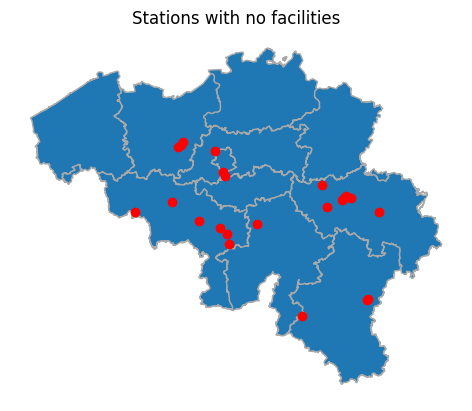

In [10]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, edgecolor = "darkgrey")
ax.scatter(facilities[facilities["count"] == 0]["longitude"], facilities[facilities["count"] == 0]["latitude"], color = "red", zorder = 3)
ax.axis('off')
plt.title("Stations with no facilities")
plt.show()


In [9]:
facilities["count"].describe()

count    555.000000
mean       4.059459
std        3.128718
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: count, dtype: float64

In [ ]:
facilities["count"].plot.hist()
plt.title("Frequency of the number of facilities in a station")
plt.xlabel("Number of facilities")

In [ ]:
stations_distance = data.stations_distance
stations_distance["stationfrom"]= stations_distance["stationfrom"].str.lower()
stations_distance["stationto_n"] = stations_distance["stationto_n"].str.lower()
stations_distance.sort_values(by="length", ascending = False)

In [ ]:
stations_distance["total_length"] = stations_distance.groupby("stationfrom")["length"].transform("sum")
stations_distance["count"] = stations_distance.groupby("stationfrom")["stationfrom"].transform("count")
# stations_distance = stations_distance.groupby("stationfrom").sum().reset_index()[["stationfrom", "length", "count"]].rename({"stationfrom": "station"}, axis=1)
stations_distance["length/count"] = stations_distance["total_length"] / stations_distance["count"]
stations_distance

In [ ]:
stations_distance = stations_distance[["stationfrom", "total_length","count",  "length/count"]].drop_duplicates().rename(columns = {"stationfrom" : "station", "count" : "neighbours_count"})
stations_distance

The 10 stations with the least neighbouring stations, these are the least accessible stations:

In [ ]:
stations_distance[["station", "neighbours_count"]].sort_values(by = "neighbours_count", ascending = True).head(10)

In [ ]:
stations_distance["neighbours_count"].plot.hist()
plt.title("Frequency of the number of neighbours of a station")
plt.xlabel("Number of neighbouring stations")

The 10 stations with the least distance to neighbouring stations:

In [ ]:
stations_distance[["station", "total_length"]].sort_values(by = "total_length", ascending = True).head(10)

In [ ]:
stations_distance["total_length"].plot.hist()
plt.title("Frequency of the total length between stations")
plt.xlabel("Total length in km")

The  10 stations with the  least distance to neighbouring stations, divided by the number of neighbouring stations (average length)

In [ ]:
stations_distance[["station", "length/count"]].sort_values(by = "length/count", ascending = True).head(10)

In [ ]:
stations_distance["length/count"].plot.hist()
plt.title("Frequency of the total length in km divided by the number of neighbouring stations")
plt.xlabel("Total length in km divided by the number of neighbouring stations")

Are the number of neighbors ( how isolated the station is ), correlated with the satisfaction score?

In [ ]:
satisfaction = data.satisfaction
satisfaction = stations_distance.merge(satisfaction, on ="station")
satisfaction

Slight positive correlation

In [ ]:
satisfaction.describe()

In [ ]:
satisfaction["neighbours_count"].corr(satisfaction["Avg Satisfaction"])

In [ ]:
import numpy as np
sfig, ax = plt.subplots()
ax.scatter(satisfaction["neighbours_count"], satisfaction["Avg Satisfaction"])
ax.set_xlabel("Neighbours count")
ax.set_ylabel("Satisfaction score /100")
ax.set_title("Stations satisfaction score vs neighbours count")
z = np.polyfit(satisfaction["neighbours_count"], satisfaction["Avg Satisfaction"], 1)
p = np.poly1d(z)
plt.plot(satisfaction["neighbours_count"],p(satisfaction["neighbours_count"]),"r--")
plt.show()

Check which stations only have 1 neighbor

In [ ]:
stations = data.stations
stations["name"] = stations["name"].str.lower()

stations_1_neighbor = satisfaction[satisfaction["neighbours_count"] == 1]
stations_1_neighbor = stations_1_neighbor.merge(stations,left_on = "station" ,right_on ="name" )
stations_1_neighbor

The most isolated stations, stations that only have 1 neighbor station,  are located at the border. This is logical.

In [ ]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
ax.scatter(stations_1_neighbor["longitude"], stations_1_neighbor["latitude"], color = "red", zorder = 3)
ax.axis('off')
plt.title("Stations with 1 neighboring station" )
plt.show()

Calculating the average travel time to a station

In [ ]:
trips = data.full_trips
trips = trips.sort_values(by = ["Train number", "Time of planned departure"])
trips["Planned_travel_time"] = (trips["Time of planned arrival"] - trips["Time of planned departure"].shift(1)).dt.seconds
trips["Real_travel_time"] = (trips["Time of real arrival"] - trips["Time of real departure"].shift(1)).dt.seconds
trips.drop(trips[trips["Planned_travel_time"] == 0].index, inplace = True)
trips.dropna(subset = ["Planned_travel_time"], inplace = True)
trips.drop(trips[trips["Planned_travel_time"] > 3600].index, inplace = True)
trips.drop(trips[trips["Real_travel_time"] == 0].index, inplace = True)
trips.dropna(subset = ["Real_travel_time"], inplace = True)
trips.drop(trips[trips["Real_travel_time"] > 3600].index, inplace = True)
trips

In [ ]:
train_numbers = trips["Train number"].unique()
#routes is a dictionary that takes the train number as key and returns all the subsequent stop this train has passed through
routes = {}
for train_number in train_numbers:
    routes[train_number] = trips[trips["Train number"] == train_number].sort_values(by= [ "Time of planned departure"])

In [ ]:
routes.get(10)

In [ ]:
# for train_number in train_numbers:
#         routes.get(train_number)["Difference"] = (routes.get(train_number)["Time of planned arrival"] - routes.get(train_number)["Time of planned departure"].shift(1)).dt.seconds
#


In [ ]:
# for train_number in train_numbers:
#     routes.get(train_number).loc[routes.get(train_number)["Difference"] > 7200, "Difference"] = np.nan
#     routes.get(train_number)["Difference"] = routes.get(train_number)["Difference"].fillna(0)
#     routes.get(train_number).drop(routes.get(train_number)[routes.get(train_number)["Difference"] == 0].index, inplace = True)


In [ ]:
import pandas as pd
mean_difference_real = pd.DataFrame()
for train_number in train_numbers:
    mean_difference_real = mean_difference_real.append(routes.get(train_number).groupby("Name of the stop")["Real_travel_time"].mean().reset_index())
mean_difference_planned = pd.DataFrame()
for train_number in train_numbers:
    mean_difference_planned = mean_difference_planned.append(routes.get(train_number).groupby("Name of the stop")["Planned_travel_time"].mean().reset_index())

In [ ]:
mean_difference_real = mean_difference_real.groupby("Name of the stop")["Real_travel_time"].mean().reset_index()
mean_difference_real["Real_travel_time"] = mean_difference_real["Real_travel_time"]/60

mean_difference_planned = mean_difference_planned.groupby("Name of the stop")["Planned_travel_time"].mean().reset_index()
mean_difference_planned["Planned_travel_time"] = mean_difference_planned["Planned_travel_time"]/60


In [ ]:
mean_difference_real.describe()

In [ ]:
mean_difference_planned.describe()

For each train stop, we now know the average travel time to that stop.

In [ ]:
mean_difference_real.sort_values(by = "Real_travel_time").head(10)

In [ ]:
mean_difference_real = mean_difference_real.merge(stations, left_on ="Name of the stop", right_on = "name")
mean_difference_real

In [ ]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
ax.scatter(mean_difference_real.sort_values(by = "Real_travel_time", ascending = False).head(50)["longitude"], mean_difference_real.sort_values(by = "Real_travel_time", ascending= False).head(50)["latitude"], color = "red", zorder = 3)
ax.axis('off')
plt.title("Top 50 stations with the longest real travel time to other stations" )
plt.show()

In [ ]:
mean_difference_planned = mean_difference_planned.merge(stations, left_on ="Name of the stop", right_on = "name")

In [ ]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
ax.scatter(mean_difference_planned.sort_values(by = "Planned_travel_time", ascending = False).head(50)["longitude"], mean_difference_planned.sort_values(by = "Planned_travel_time", ascending = False).head(50)["latitude"], color = "red", zorder = 3)
ax.axis('off')
plt.title("Top 50 stations with the longest planned travel time to other stations" )
plt.show()

If we look at the 20 stations with the highest travel time to other stations, we can see they are again stations that are close to the borders.

In [ ]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
ax.scatter(mean_difference_real.sort_values(by = "Real_travel_time", ascending = True).head(50)["longitude"], mean_difference_real.sort_values(by = "Real_travel_time", ascending = True).head(50)["latitude"], color = "red", zorder = 3)
ax.axis('off')
plt.title("Top 50 stations with the shortest real travel time to other stations" )
plt.show()

In [ ]:
mean_difference_real["Real_travel_time"].describe()

In [ ]:
# import matplotlib.patches as mpatches
# fig, ax = plt.subplots()
# df = mean_difference_real.sort_values(by = "Real_travel_time", ascending = False)
# data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
# ax.scatter(df[df["Real_travel_time"] > 4.986452]["longitude"], df[df["Real_travel_time"] > 4.986452]["latitude"], color = "red", alpha =0.5, zorder = 100)
# ax.scatter(df[ (df["Real_travel_time"] > 3.294620 )& (df["Real_travel_time"] <=4.986452)  ]["longitude"], df[(df["Real_travel_time"] > 3.294620 )& (df["Real_travel_time"] <=4.986452) ]["latitude"], color = "orange",alpha =0.5 )
#
# ax.scatter(df[ (df["Real_travel_time"] > 2.394955 )& (df["Real_travel_time"] <=3.294620)  ]["longitude"], df[(df["Real_travel_time"] > 2.394955 )& (df["Real_travel_time"] <=3.294620) ]["latitude"], color = "yellow", alpha =0.5)
#
# ax.scatter(df[df["Real_travel_time"] <2.394955]["longitude"], df[df["Real_travel_time"] < 2.394955]["latitude"], color = "green", alpha =0.5)
# red_patch = mpatches.Patch(color='red', label='> 4.986452 minutes')
# orange_patch = mpatches.Patch(color='orange', label='> 3.294620 and <= 4.986452 minutes')
# yellow_patch = mpatches.Patch(color='yellow', label='> 2.394955 and <= 3.294620 minutes')
# green_patch = mpatches.Patch(color='green', label='<= 2.394955')
# plt.legend(handles=[red_patch, orange_patch, yellow_patch, green_patch])
# plt.title("Real travel time to the stations")
# ax.axis('off')
# plt.show()
import matplotlib.patches as mpatches
fig, ax = plt.subplots()
df = mean_difference_real.sort_values(by = "Real_travel_time", ascending = False)
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
ax.scatter(df[df["Real_travel_time"] > 5]["longitude"], df[df["Real_travel_time"] > 5]["latitude"], color = "red", alpha =0.5, zorder = 100)
ax.scatter(df[ (df["Real_travel_time"] > 3 )& (df["Real_travel_time"] <=5)  ]["longitude"], df[(df["Real_travel_time"] > 3 )& (df["Real_travel_time"] <=5) ]["latitude"], color = "orange",alpha =0.5 )

ax.scatter(df[ (df["Real_travel_time"] > 2 )& (df["Real_travel_time"] <=3)  ]["longitude"], df[(df["Real_travel_time"] > 2 )& (df["Real_travel_time"] <=3) ]["latitude"], color = "yellow", alpha =0.5)

ax.scatter(df[df["Real_travel_time"] <2]["longitude"], df[df["Real_travel_time"] < 2]["latitude"], color = "green", alpha =0.5)
red_patch = mpatches.Patch(color='red', label='> 5 minutes')
orange_patch = mpatches.Patch(color='orange', label='> 3 and <= 5 minutes')
yellow_patch = mpatches.Patch(color='yellow', label='> 2 and <= 3 minutes')
green_patch = mpatches.Patch(color='green', label='<= 2')
plt.legend(handles=[red_patch, orange_patch, yellow_patch, green_patch])
plt.title("Real travel time to the stations")
ax.axis('off')
plt.show()

We see that even though some red dots are as close to each other as some other green / yellow dots are, we can create some new train routes that connects the red dots so we can reduce the delay time.

# From here on we will do some extra analysis

# Does the average travel time to a station influence the satisfaction score?

No correlation

In [ ]:
satisfaction = satisfaction.merge(mean_difference_real, left_on = "station", right_on ="Name of the stop")
satisfaction["Avg Satisfaction"].corr(satisfaction["Real_travel_time"])

In [ ]:
plt.scatter(satisfaction["Real_travel_time"], satisfaction["Avg Satisfaction"])
plt.title("Station's satisfaction score vs real travel time ")
plt.xlabel("Real travel time in minutes")
plt.ylabel("Satisfaction score /100")
plt.show()

# Number of neighbors correlated with avg travel time?

no correlation

In [ ]:
test = stations_distance.merge(mean_difference_real, left_on="station" , right_on = "Name of the stop")
test["neighbours_count"].corr(test["Real_travel_time"])

In [ ]:
plt.scatter(test["neighbours_count"], test["Real_travel_time"])
plt.title("Station's satisfaction score vs real travel time ")
plt.xlabel("Real travel time in minutes")
plt.ylabel("Satisfaction score /100")
plt.show()

# Avg travel time correlated with delay frequency?

In [ ]:
stations_delay_percentage = trips[trips["Delay time"] > 0].groupby("Name of the stop").size().div(trips.groupby("Name of the stop").size()).reset_index().rename(columns={0: "Percentage of delays"})
stations_delay_percentage

In [ ]:
test1 = mean_difference_real.merge(stations_delay_percentage, left_on = "name", right_on = "Name of the stop")
test1

No correlation

In [ ]:
test1[["Real_travel_time","Percentage of delays"]]

In [ ]:
test1["Real_travel_time"].corr(test1["Percentage of delays"])

In [ ]:
fig, ax = plt.subplots()
ax.scatter(test1["Real_travel_time"], test1["Percentage of delays"])
ax.set_xlabel("Real travel time in minutes")
ax.set_ylabel("Percentage of delays")
ax.set_title("Percentage of delays vs real travel time")



# Avg travel time correlated with mean delay time?

In [ ]:
mean_delay_df = trips.groupby("Name of the stop")["Delay time"].mean().reset_index()
mean_delay_df

In [ ]:
test2 = mean_difference_real.merge(mean_delay_df, left_on = "name", right_on = "Name of the stop")
test2

Also no correlation

In [ ]:
test2["Real_travel_time"].corr(test2["Delay time"])

In [ ]:
fig, ax = plt.subplots()
ax.scatter(test2["Real_travel_time"], test2["Delay time"])
ax.set_xlabel("Real travel time in minutes")
ax.set_ylabel("Delay time in minutes")
ax.set_title("Delay time per real travel time")

# Is number of neighbours / total length to neighbours correlated with the Delay frequency?

In [ ]:
trips = data.full_trips
trips

In [ ]:
stations_delay_percentage = trips[trips["Delay time"] > 0].groupby("Name of the stop").size().div(trips.groupby("Name of the stop").size()).reset_index().rename(columns={0: "Percentage of delays"})
stations_delay_percentage

In [ ]:
merged_df = stations_distance.merge(stations_delay_percentage, left_on = "station", right_on = "Name of the stop")
merged_df

no correlation between either length or neighboars and the percentage of delays.

In [ ]:
merged_df["total_length"].corr(merged_df["Percentage of delays"])

In [ ]:
merged_df["neighbours_count"].corr(merged_df["Percentage of delays"])

A little bit of negative correlation

In [ ]:
merged_df["length/count"].corr(merged_df["Percentage of delays"])

In [ ]:
stations_delay_time = trips.groupby("Name of the stop")["Delay time"].mean().reset_index().rename(columns={"Delay time": "Average delay time"})
stations_delay_time

In [ ]:
merged_df2 = stations_distance.merge(stations_delay_time, left_on = "station", right_on = "Name of the stop")
merged_df2

Also no correlation with the average delay time.

In [ ]:
merged_df2["total_length"].corr(merged_df2["Average delay time"])

In [ ]:
merged_df2["neighbours_count"].corr(merged_df2["Average delay time"])

In [ ]:
merged_df2["length/count"].corr(merged_df2["Average delay time"])

In [ ]:
stations = data.stations
stations["name"]= stations["name"].str.lower()

In [ ]:
merged_df3 = stations_delay_time.merge(stations, left_on = "Name of the stop", right_on = "name").merge(stations_delay_percentage,left_on = "Name of the stop", right_on = "Name of the stop")
merged_df3

# Plot the average delay per station on a map

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data.provinces.plot(ax=ax)
sc =ax.scatter(merged_df3["longitude"], merged_df3["latitude"], c = merged_df3["Average delay time"], cmap = "Reds")
cbar = fig.colorbar(sc)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Average delay time per station")
plt.show()



# Plot the percentage of delays per station on a map

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data.provinces.plot(ax=ax)

sc = ax.scatter(merged_df3["longitude"], merged_df3["latitude"], c = merged_df3["Percentage of delays"], cmap = "Reds")
cbar = fig.colorbar(sc)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Percentage of delays per station")
plt.show()
